# Individual Project EDA

## Introduction
In this project, you will analyze a dataset about used cars. You’ll perform an Exploratory Data Analysis (EDA) or Data Exploration. It is a step in the Data Analysis Process where several techniques are used to understand the dataset better. A good EDA can drive how to perform a Machine Learning project: how to treat features, discard some of them, data scaling, etc.

## Objectives
- Extracting important variables and removing useless variables/features
- Identifying outliers, missing values, or human error.
- Understanding the relationship between variables
- Maximizing your insights into a dataset and minimizing potential errors that may occur later in the process. Get Domain Knowledge.



# General Analysis

## Dataset Information
The dataset, csv, tar.gz compressed, is in the attached file vehicles.csv.tar.gz. The data comes from a Kaggle challenge.
With the dataset information, do the following:

# First look

1. Loading of the dataset.
2. Shows the first ten rows.
3. an you infer the meaning of the features? Try.
4. Count the unique values of each feature.
5. Get a statistical summary.
6. Do you find something wrong? Which features are affected?
7. We have a categorical feature: *‘condition.’* What are its values? Is everything ok with it? Why?
8. Working with the *‘condition’* feature, it has syntactic problems, i.e., nan values, but also semantic problems: the *‘like new’* value has the same meaning as *‘excellent.’*? 
9. Reassign the *‘good’* and *‘fair’* values to *‘good.’* 
10. Reassign *‘excellent’* and *‘like new’* to *‘excellent.’* 


In [1]:
#1.Loading of the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:

df = pd.read_csv('vehicles.csv')



In [3]:
# 2.Shows the first ten rows.
print(df.head(10))


           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
5  7222379453  https://hudsonvalley.craigslist.org/cto/d/west...   
6  7221952215  https://hudsonvalley.craigslist.org/cto/d/west...   
7  7220195662  https://hudsonvalley.craigslist.org/cto/d/poug...   
8  7209064557  https://medford.craigslist.org/cto/d/grants-pa...   
9  7219485069  https://erie.craigslist.org/cto/d/erie-2012-su...   

                   region                           region_url  price  year  \
0                prescott      https://prescott.craigslist.org   6000   NaN   
1            fayetteville         https://fayar.craigslist.org  11900   NaN   
2            f

In [4]:
# 3.an you infer the meaning of the features? Try.
# Displaying the column names to infer their meanings
print("Column Names:", df.columns)

# Displaying data types of each column to help understand what kind of values they hold
print("Data Types:\n", df.dtypes)

# Displaying a sample of data to see example values for each feature
print("Sample Data:\n", df.sample(5))




Column Names: Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')
Data Types:
 id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: ob

In [5]:
# 4. Count the unique values of each feature.
unique_values = df.nunique()
print("Unique Values:\n", unique_values)




Unique Values:
 id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64


In [6]:
#5. Get a statistical summary.
df.describe(include='all')


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,...,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,...,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,...,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


# 6. Do you find something wrong? Which features are affected?
## Dataset Summary Issues
**1. Count as a Float**
The 'count' is showing up as a float (e.g., `4.268800e+05`) which should typically be an integer since it represents the number of non-null entries in the dataset for each feature.

**2. Scientific Notation**
The numbers are displayed in scientific notation, which might not be an issue per se but can be harder to interpret compared to standard decimal notation, especially for certain fields like 'year' or 'count' where scientific notation is uncommon.

**3. ID as a Numerical Summary**
The 'id' column has been summarized with statistical measures such as mean, std, min, etc. Normally, an 'id' column is a unique identifier for each row and should not be subjected to statistical analysis since it doesn't have a quantitative meaning.

**4. URLs in Statistical Summary**
The 'url' and 'region_url' columns are also being summarized statistically, which is not applicable as they are categorical strings, not numerical data.

**5. Meaningless Descriptive Stats for Categorical Variables**
Categorical variables such as 'region', 'manufacturer', 'model', 'condition', and potentially 'cylinders' are treated with numerical descriptive statistics. These should be described using frequency counts or unique value counts instead of means and standard deviations.

**6. Extreme Values**
The 'year' field shows a minimum value of 1900, which could be an outlier or incorrect data, especially if this dataset is supposed to represent recent car listings.

**7. Missing Values Indicated by NaN**
There are many 'NaN' values in places where we would expect actual statistics. This indicates that either the data for that column is not numeric (and thus cannot be summarized with these statistics), or there are too many missing values.



In [7]:
#7. We have a categorical feature: ‘condition.’ What are its values? Is everything ok with it? Why?
# Get the unique values of the 'condition' feature
condition_values = df['condition'].unique()

# Display the unique values and their counts
print("Unique Values of 'condition':")
print(condition_values)

# Count the occurrences of each unique value
print("\nOccurrences of Each Unique Value:")
print(df['condition'].value_counts())


Unique Values of 'condition':
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']

Occurrences of Each Unique Value:
condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64


In [8]:
# 8. Working with the ‘condition’ feature, it has syntactic problems, i.e., nan values, but also semantic problems: the ‘like new’ value has the same meaning as ‘excellent.’? 
# Handle NaN values
# Option 1: Remove rows with NaN values
df.dropna(subset=['condition'], inplace=True)

# Option 2: Impute NaN values with the most frequent condition
# df['condition'].fillna(df['condition'].mode()[0], inplace=True)

# Semantic correction
# Consolidate 'like new' and 'excellent' into a single category
df['condition'].replace({'like new': 'excellent'}, inplace=True)



C:\Users\deniz\AppData\Local\Temp\ipykernel_21520\390577303.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['condition'].replace({'like new': 'excellent'}, inplace=True)


In [9]:
#9. Reassign the ‘good’ and ‘fair’ values to ‘good.’ 
df['condition'].replace({'good': 'good', 'fair': 'good'}, inplace=True)


In [10]:
#10. Reassign ‘excellent’ and ‘like new’ to ‘excellent.’

# Reassign 'excellent' and 'like new' values to 'excellent'
df['condition'].replace({'like new': 'excellent'}, inplace=True)





# Cleaning data

**Remove redundant and sparse features**

  1. Remove redundant or unusable data: drop the `URL`, `image_url`, and `city_url` features.
  2. Remove any feature that has more than 40% of null values.
  3. What are the remaining features?



In [11]:
#1. Remove redundant or unusable data: drop the `URL`, `url`, and 'region_url' features.

df.drop(['url', 'image_url', 'region_url'], axis=1, inplace=True)




In [12]:
#2. Remove any feature that has more than 40% of null values.

# Calculate the percentage of null values in each feature
null_percentage = df.isnull().mean() * 100

# Identify features that have more than 40% null values
features_to_drop = null_percentage[null_percentage > 40].index

# Drop features with more than 40% null values
df.drop(features_to_drop, axis=1, inplace=True)




In [13]:
#3. What are the remaining features?
print("Remaining Features:", df.columns)


Remaining Features: Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


**Remove outliers**

Outlier values are values outside reasonable boundaries. For example, if you manage an industrial oven with a working range between 1500°C and 2100°C, a reading of 6000°C is an outlier (At 6000°C, the oven would have already exploded). Another example: You are a banker and suddenly see a drop in the price of Apple stock of 63%. Is it an outlier? Why?

We detected an outlier problem with `price`, `year`, and `odometer`.

  1. Set a reasonable range for the three features. Explain your decision.
  2. Remove the data point (rows) that doesn't comply with your defined ranges.
  3. Remove any data point with null values.
  4. What's the resulting number of rows? What percentage of rows did we remove due to the cleaning and removing of outliers? Is the dataset still usable? Why?


In [14]:
# 1. Define reasonable ranges for each feature
price_range = (500, 200000)
year_range = (1980, 2023)
odometer_range = (0, 400000)

#2. Remove rows that do not comply with the defined ranges
df_cleaned = df[(df['price'].between(*price_range)) & 
                (df['year'].between(*year_range)) & 
                (df['odometer'].between(*odometer_range))]

#3. Remove rows with null values
df_cleaned.dropna(inplace=True)

# Make a copy of the cleaned DataFrame to avoid SettingWithCopyWarning
df_cleaned = df_cleaned.copy()
#4. Calculate the percentage of rows removed
percentage_removed = ((len(df) - len(df_cleaned)) / len(df)) * 100

#5. Print the number of resulting rows and the percentage of removed rows
print("Number of rows after cleaning:", len(df_cleaned))
print("Percentage of removed rows:", percentage_removed)




Number of rows after cleaning: 106811
Percentage of removed rows: 57.744801721682435


C:\Users\deniz\AppData\Local\Temp\ipykernel_21520\2948458207.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


# Feature Relations

1. **Plot the correlation Matrix.**
2. **We see a positive correlation between price and year.** Explain it and code a scatter plot to see its relation graphically.
3. **We also appreciate a negative correlation between price and odometer.** Explain it and code a scatter plot.
4. **Use Seaborne pairplot() to analyze all the scatterplots at once visually.**


C:\Users\deniz\AppData\Local\Temp\ipykernel_21520\2167615160.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_yticklabels(cbar.get_yticklabels(), fontsize=12)


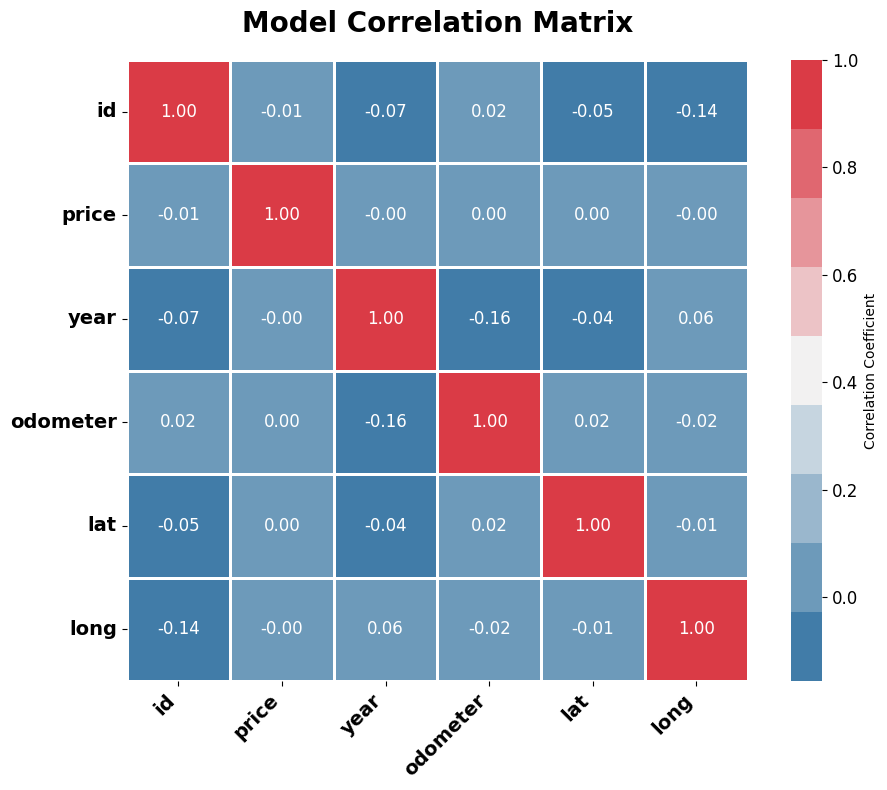

In [15]:
#1. Plot the correlation Matrix.

# Select only numerical columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set the overall size and style of the plot
plt.figure(figsize=(10, 8))

# Define a color palette as in the image
cmap = sns.diverging_palette(240, 10, n=9)

# Create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={"size": 12}, square=True, linewidths=2, linecolor='white')

# Add a title with similar features as in the image
plt.title('Model Correlation Matrix', fontsize=20, color='black', weight='bold', pad=20)

# Improve readability by adjusting the orientation of the x and y axis labels
plt.xticks(rotation=45, horizontalalignment='right', fontsize=14, weight='bold')
plt.yticks(rotation=0, fontsize=14, weight='bold')

# Adjust the readability of the color bar
cbar = plt.gcf().axes[-1]
cbar.set_yticklabels(cbar.get_yticklabels(), fontsize=12)

# Adjust the margins of the plot to prevent cuts in the labels
plt.tight_layout()

# Display the correlation matrix plot
plt.show()


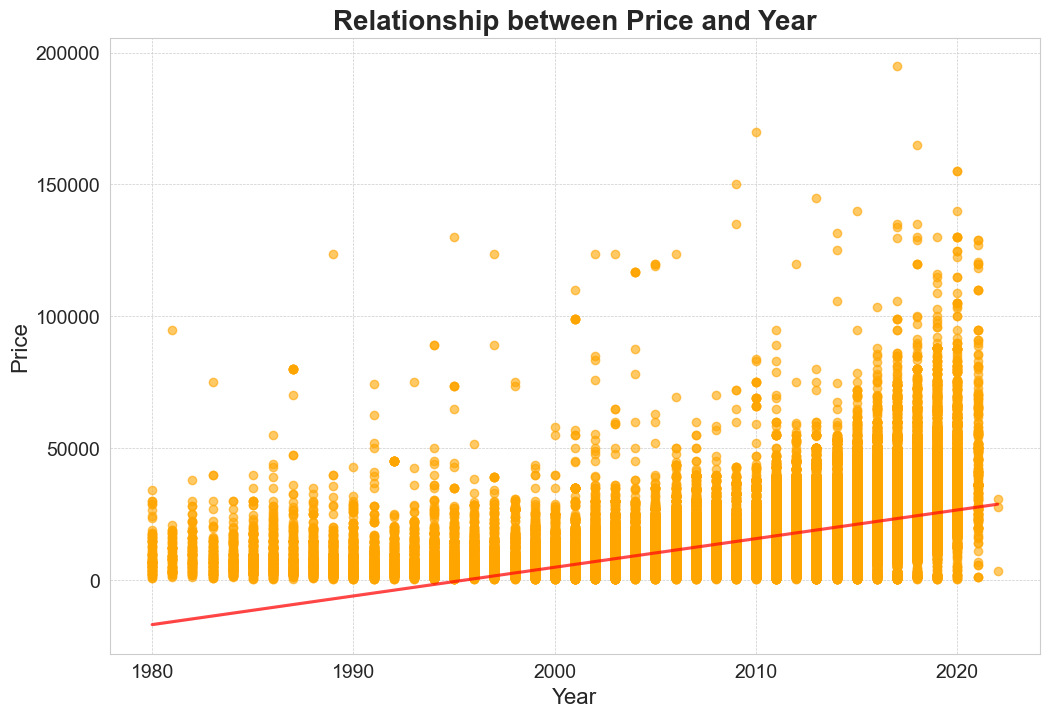

In [16]:
#2. We see a positive correlation between price and year. Explain it and code a scatter plot to see its relation graphically.


# Set the aesthetic style of the plots
sns.set_style("whitegrid")  # This provides a nice clean grid background

# Create the scatter plot with a regression line
plt.figure(figsize=(12, 8))  # Increase the figure size for better readability
scatter = sns.regplot(x='year', y='price', data=df_cleaned,
                      scatter_kws={'color': 'orange', 'alpha': 0.6},  # Scatter plot customization
                      line_kws={'color': 'red', 'alpha': 0.7})  # Line plot customization

# Adding titles and labels with enhanced formatting
plt.title('Relationship between Price and Year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price', fontsize=16)

# Improve tick marks for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a grid to enhance plot readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


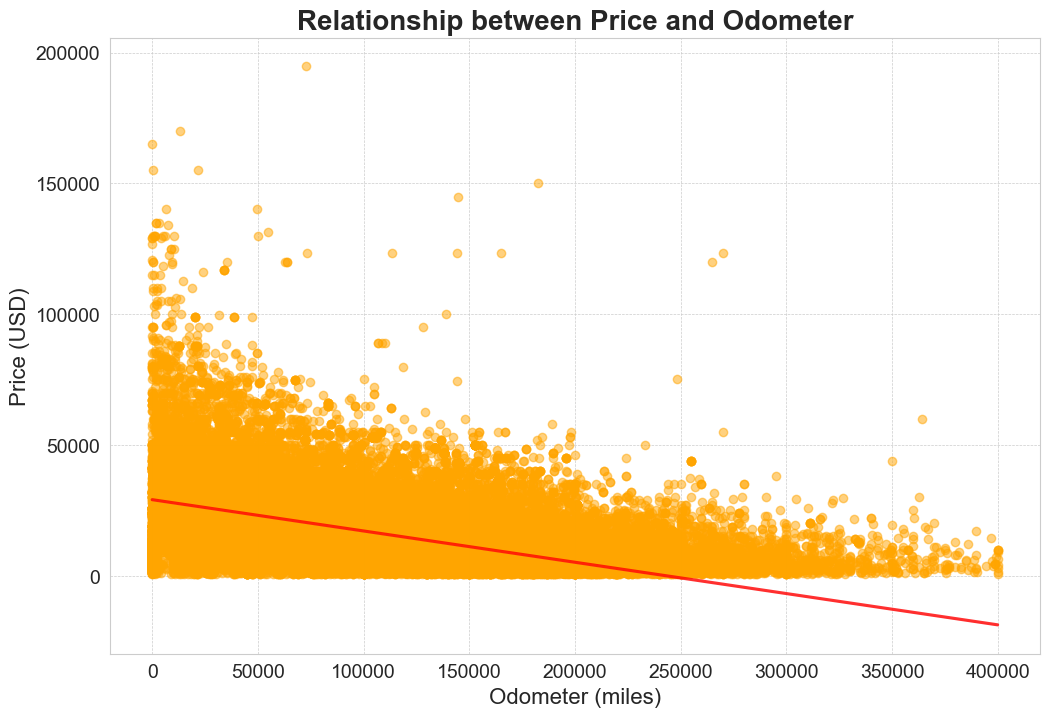

In [17]:
#3. A negative correlation between price and odometer suggests that as the odometer reading (mileage) increases, the price of the vehicle tends to decrease. This is expected as higher mileage often indicates more wear and tear, which can reduce the vehicle's value.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is your DataFrame and it has 'price' and 'odometer' columns properly cleaned

# Set a style using seaborn for cleaner aesthetics
sns.set_style("whitegrid")

# Create the scatter plot with a regression line to emphasize the negative correlation
plt.figure(figsize=(12, 8))  # Increase the figure size for better visibility
scatter = sns.regplot(x='odometer', y='price', data=df_cleaned,
                      scatter_kws={'color': 'orange', 'alpha': 0.5},  # Customization for scatter points
                      line_kws={'color': 'red', 'alpha': 0.8})  # Customization for the regression line

# Adding enhanced titles and labels
plt.title('Relationship between Price and Odometer', fontsize=20, fontweight='bold')
plt.xlabel('Odometer (miles)', fontsize=16)  # Adding units for clarity
plt.ylabel('Price (USD)', fontsize=16)       # Adding currency for clarity

# Improve tick mark readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a grid with customized style for better readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\deniz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

<Figure size 1200x1200 with 0 Axes>

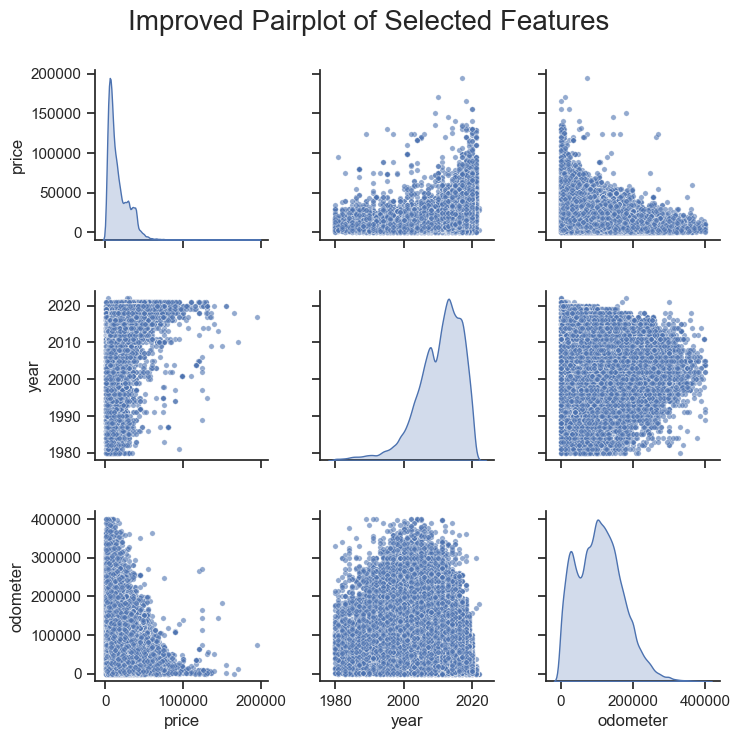

In [18]:
#4. Use Seaborne pairplot() to analyze all the scatterplots at once visually.

# Select a subset of columns if there are many
columns_to_plot = ['price', 'year', 'odometer']  # Example columns
df_subset = df_cleaned[columns_to_plot]

# Normalize the data (optional)
# df_subset = np.log1p(df_subset)  # Only if the data allows it and it makes sense to apply logarithm

sns.set(style="ticks", context="notebook")

# Increase space between the plots
plt.figure(figsize=(12, 12))  # Adjust this according to your needs

pairplot = sns.pairplot(df_subset, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 15}, palette='viridis')
pairplot.fig.suptitle('Improved Pairplot of Selected Features', fontsize=20)
plt.subplots_adjust(top=0.9, hspace=0.3, wspace=0.3)  # Adjust spaces to avoid overlap

plt.show()






# Feature analysis


**We want to see the distribution of the values of a feature.** 


Plot a histogram of the feature *‘odometer.’* Use 50 bins for the plot. You’ll see a frequency maximum for a specific odometer value range. Explain it.
Plot a histogram of the feature *‘year.’* Use 20 bins for the plot. You’ll see a frequency maximum for a specific year value range. Explain it.

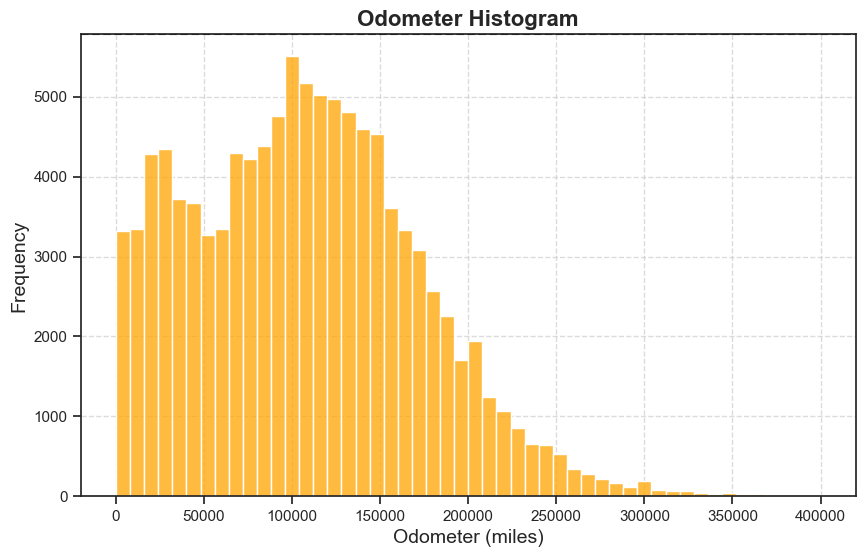

In [19]:
# Plot a histogram of the "odometer" feature with 50 bins
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['odometer'], bins=50, kde=False, color='orange')
plt.title('Odometer Histogram', fontsize=16, fontweight='bold')
plt.xlabel('Odometer (miles)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=plt.gca().get_ylim()[1], color='black', linewidth=1.5, linestyle='--')
plt.show()




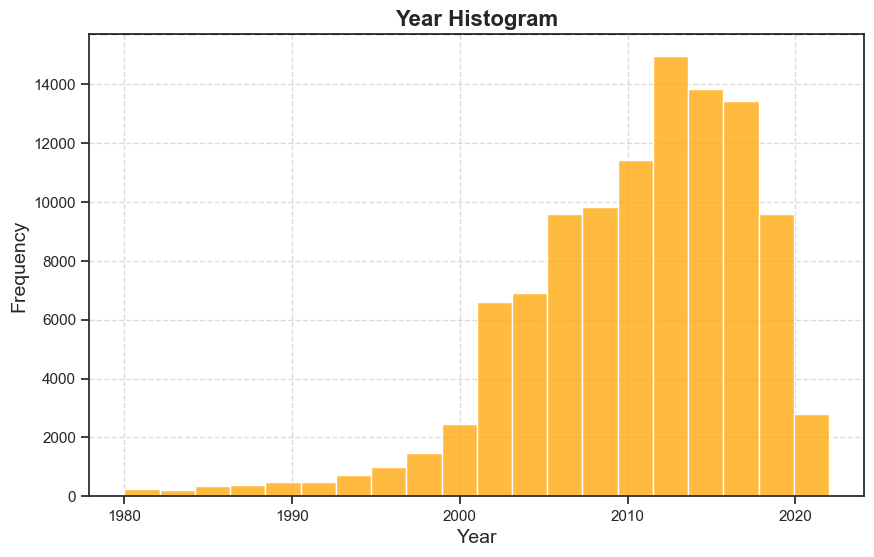

In [20]:
# Plot a histogram of the year feature with 20 bins
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['year'], bins=20, kde=False, color='orange')
plt.title('Year Histogram', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=plt.gca().get_ylim()[1], color='black', linewidth=1.5, linestyle='--')
plt.show()


### Conclusion

You worked as a Machine Learning analyst to make all the previous analyses, but you're now the boss of *BestCars Inc.* Your company owns all those cars, and you lease them to other companies (This is the main business of ALD Automotive, for example). You know that their storage and maintenance aren’t cheap. You have to make a decision.

- Sell all the cars older than a specific year.
- Sell all the cars with heavy usage (significant odometer values)
- Sell all the cars with a bad status. Remember the **‘condition’** feature.

What would you do? There’s no right or wrong answer to this question. The point is that you need to **build a narrative** for your decisions. As an ML engineer or as the boss, it doesn’t matter, you’ll have to convince others of your actions. As an ML Engineer, you have to convince your boss, and the boss needs to convince the shareholders.

Being an ML Engineer or a Data Scientist is more than just knowing some technical things. Your value will multiply if you **explain** what you see in the data.

Think about it: Do I have enough data to make a decision? What extra data do I need? Why?



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecciona características relevantes y divide los datos
features = ['year', 'odometer', 'condition']
X = df_cleaned[features]
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor for categorical features
categorical_features = ['condition']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define preprocessor for numerical features
numeric_features = ['year', 'odometer']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessor for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipeline with preprocessor and regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Model evaluation
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)


Train MSE: 101431851.71145023
Test MSE: 102198243.00730234
Train R^2: 0.4211743642220941
Test R^2: 0.4203305834864176


To conclude, I developed a linear regression model with the intention of supporting my decision, with an objective evaluation, considering multiple factors systematically, offering future predictions, and thus optimizing the use of resources and supporting decision making with analytical support. solid.
Although this is not essential, since by intuition one can decide which cars should be sold as soon as possible and which ones should not be sold according to their year or mileage in addition to their condition.
     Based on the results of our linear regression model, we determine that:

* The MSE (Mean Square Error) on the training set is about 101,431,851.71, while on the test set it is about 102,198,243.01.
* The coefficient of determination R^2 in the training set is about 0.421, indicating that our model explains about 42.1% of the variability in car prices in the training set.
* The coefficient of determination R^2 in the test set is about 0.420, suggesting that our model generalizes reasonably well to new data, explaining about 42.0% of the variability in car prices in the test set.
* These results tell us that our linear regression model has moderate performance in predicting car prices. Although it explains a significant portion of the variability in prices, there is still room to improve the accuracy of the predictions.

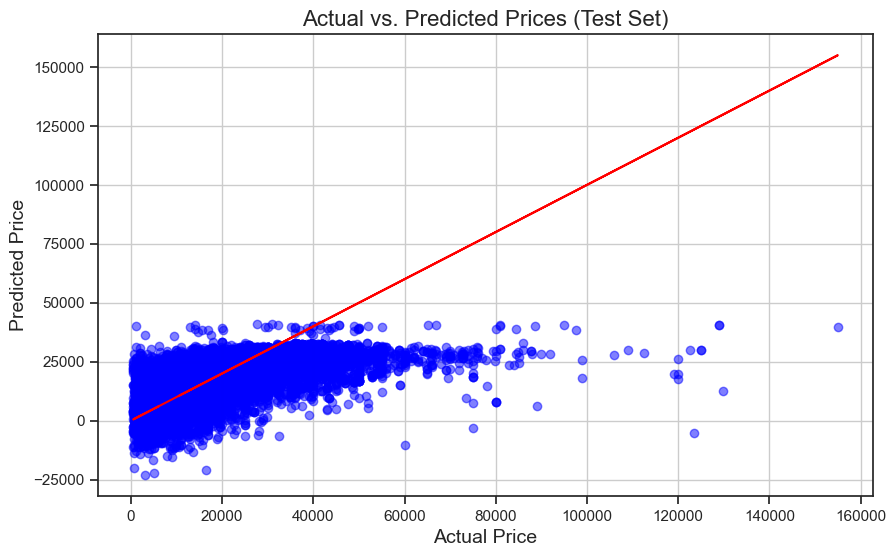

In [35]:
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs. predicted values in the test set
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)

# Plotting the perfect prediction line
plt.plot(y_test, y_test, color='red')

plt.title('Actual vs. Predicted Prices (Test Set)', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.grid(True)
plt.show()
